In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

In [3]:
dataset = '''A minister is a politician who heads a ministry, making and implementing decisions on policies in conjunction with the other ministers. In some jurisdictions the head of government is also a minister and is designated the 'prime minister', 'premier', 'chief minister', 'chancellor' or other title.'''

In [25]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

query = "politician"

N = len(dataset)
P = dataset.find(query)+1
W = len(query)
E = dataset.count(query)

purity = W*P/N
entropy = W*E/N
print("Purity:", purity)
print("Entropy:", entropy)

sentences = np.array(sent_tokenize(dataset))
vectorizer = TfidfVectorizer(analyzer="word")
datasetVectorized = vectorizer.fit_transform(sentences)
queryVectorized = vectorizer.transform([query])
cosine_sim_arr = cosine_similarity(datasetVectorized, queryVectorized)
cosine_sim_arr_enumerated = np.array(list(enumerate(cosine_sim_arr.flatten())))
cosine_sim_arr_enumerated_sort = np.array(sorted(cosine_sim_arr_enumerated, key=lambda x: x[1], reverse=True))
" ".join(sentences[cosine_sim_arr_enumerated_sort[:, 1] > 0])

Purity: 0.5723905723905723
Entropy: 0.03367003367003367


'A minister is a politician who heads a ministry, making and implementing decisions on policies in conjunction with the other ministers.'

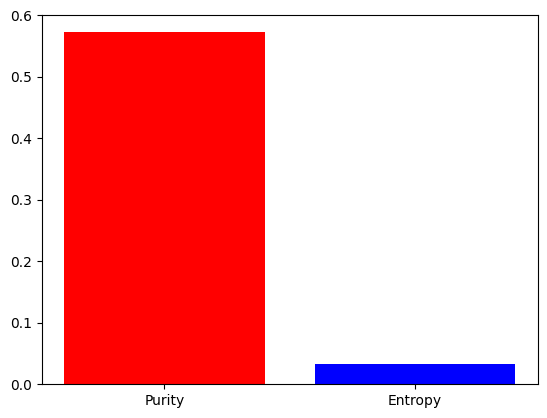

In [6]:
plt.bar(["Purity", "Entropy"], [purity, entropy], color=["red", "blue"])
import io
import base64
my_stringIObytes = io.BytesIO()
plt.savefig(my_stringIObytes, format='jpg')
my_stringIObytes.seek(0)
my_base64_jpgData = base64.b64encode(my_stringIObytes.read()).decode()
